In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR



In [28]:
df= pd.read_csv('stud.csv')

In [29]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [30]:
X=df.drop(['math_score'], axis=1)
y=df['math_score']

In [31]:
print(X.head(), y.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  reading_score  writing_score  
0                    none             72             74  
1               completed             90             88  
2                    none             95             93  
3                    none             57             44  
4                    none             78             75   0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64


In [32]:
numerical_features = X.select_dtypes(exclude=['object']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [33]:
print(numerical_features,categorical_features)

Index(['reading_score', 'writing_score'], dtype='object') Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [34]:
from calendar import c
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', numeric_transformer, numerical_features),
        ('StandardScaler', categorical_transformer, categorical_features)
    ]
    )

In [35]:
X=preprocessor.fit_transform(X)


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 19) (800,)
(200, 19) (200,)


In [37]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [38]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [39]:
model_list =[]
r2_list = []
for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train,y_train)
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
  model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])
      
  print('Model performance for Training set')
  print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
  print("- R2 Score: {:.4f}".format(model_train_r2))
  print('----------------------------------')
  print('Model performance for Test set')
  print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
  print("- R2 Score: {:.4f}".format(model_test_r2))
  r2_list.append(model_test_r2)
      
  print("----------")
  print('\n')
  


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804
----------


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253
----------


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806
----------


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7128
- Mean Absolute Error: 4.5168
- R2 Scor

In [40]:
pd.DataFrame({'Model':model_list, 'R2 Score':r2_list}).sort_values(by='R2 Score', ascending=False).reset_index(drop=True)

,Model,R2 Score
0,Ridge,0.880593
1,Linear Regression,0.880433
2,Random Forest Regressor,0.851207
3,AdaBoost Regressor,0.846455
4,Lasso,0.825320
5,K-Neighbors Regressor,0.783770
6,Decision Tree,0.750409


In [43]:
final_model = Ridge(fit_intercept=True)
final_model.fit(X_train, y_train)
y_test_pred = final_model.predict(X_test)
score = evaluate_model(y_test, y_test_pred)
print("Final model performance on training set", score)

Final model performance on training set (4.211100688014259, np.float64(5.3903870169356365), 0.880593148502874)


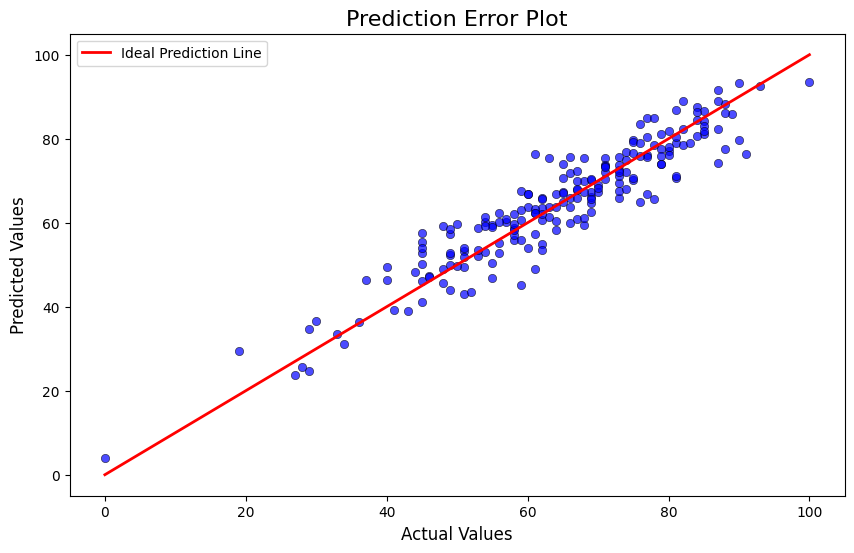

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color='blue', edgecolor='black', alpha=0.7)
sns.lineplot(x=y_test, y=y_test, color='red', lw=2, label='Ideal Prediction Line')
plt.title("Prediction Error Plot", fontsize=16)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()
plt.show()
